In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as sm
import statsmodels.api as sm
from scipy import stats
import math

In [2]:
os.chdir('/Users/linomiltenburg/Dropbox/UvA/FundamentalsofDS/week5')
#Read the individual data frames
#The default is pickle format. If you are working with the feather format, then the comments on each line indicate how to use it
anp_df = pd.read_pickle(r'use_case_2/anp.pickle') #feather.read_dataframe('data_science_case/anp.feather')
face_df = pd.read_pickle(r'use_case_2/face.pickle') #feather.read_dataframe('data_science_case/face.feather')
image_df = pd.read_pickle(r'use_case_2/image_data.pickle') #feather.read_dataframe('data_science_case/image_data.feather')
metrics_df = pd.read_pickle(r'use_case_2/image_metrics.pickle') #feather.read_dataframe('data_science_case/image_metrics.feather')
object_labels_df = pd.read_pickle(r'use_case_2/object_labels.pickle') #feather.read_dataframe('data_science_case/object_labels.feather')
survey_df = pd.read_pickle(r'use_case_2/survey.pickle') #feather.read_dataframe('data_science_case/survey.feather')

In [7]:
image_df

,image_id,image_link,image_url,image_height,image_width,image_filter,image_posted_time_unix,image_posted_time,data_memorability,user_id,user_full_name,user_name,user_website,user_profile_pic,user_bio,user_followed_by,user_follows,user_posted_photos
0,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,Leah Jenkins,leah.chelle,,https://scontent.cdninstagram.com/t51.2885-19/...,,7.0,0.0,1.0
1,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
2,594552614686078174_263042348,https://www.instagram.com/p/hARnP2pLTe/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Vesper,1385096216,22-11-2013 04:56:56,0.672679,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
3,553884883234370621_263042348,https://www.instagram.com/p/evy13fpLQ9/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Amaro,1380248245,27-09-2013 02:17:25,0.843525,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
4,725551583154452417_263042348,https://www.instagram.com/p/oRrVIcJLfB/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Amaro,1400712510,21-05-2014 22:48:30,0.859796,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
5,729007634218530400_263042348,https://www.instagram.com/p/od9JS0JLZg/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Vesper,1401124503,26-05-2014 17:15:03,0.911094,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
6,649477932919862696_263042348,https://www.instagram.com/p/kDaL0pJLWo/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Amaro,1391643824,05-02-2014 23:43:44,0.849862,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
7,528485177494910753_263042348,https://www.instagram.com/p/dVjngJpLch/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Sierra,1377220364,23-08-2013 01:12:44,0.899529,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
8,667774966458266919_263042348,https://www.instagram.com/p/lEactBpLUn/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Normal,1393825001,03-03-2014 05:36:41,0.904644,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
9,435586528885126653_263042348,https://www.instagram.com/p/YLg6PjJLX9/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1366145982,16-04-2013 20:59:42,0.930425,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0


In [5]:
image_df.corr()

,image_height,image_width,data_memorability,user_followed_by,user_follows,user_posted_photos
image_height,1.000000,0.422063,0.071813,-0.050881,-0.122988,0.074955
image_width,0.422063,1.000000,-0.039139,-0.064199,-0.077896,0.078651
data_memorability,0.071813,-0.039139,1.000000,0.062578,-0.044141,-0.085603
user_followed_by,-0.050881,-0.064199,0.062578,1.000000,0.341983,0.142963
user_follows,-0.122988,-0.077896,-0.044141,0.341983,1.000000,-0.037877
user_posted_photos,0.074955,0.078651,-0.085603,0.142963,-0.037877,1.000000


In [5]:
survey_df = survey_df.drop(survey_df.index[113])
survey_df = survey_df.drop(survey_df.index[138])

In [6]:
# rename insta_user_id to user_id
survey_df.rename(columns={"insta_user_id": "user_id"}, inplace=True)

In [7]:
survey_df

,index,id,gender,born,education,employed,income,A_2,N_1,P_1,...,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,private_account
0,0,920bf027f7d13dbdc7b66b3d3324903c,Male,1975,College graduate,Employed for wages,"$30,000 to $39,999",4,5,5,...,4.333333,4.000000,4.666667,5.000000,3.666667,4.2500,4.000000,4.333333,465.0,public
1,1,b433b2bfe49e28d0b7c45925b53084e0,Male,1978,College graduate,Employed for wages,"$20,000 to $29,999",8,0,9,...,9.000000,7.333333,9.000000,8.000000,7.666667,8.2500,0.000000,9.000000,6.0,public
2,4,f4f54676f75f47c17dc434cf68845328,Female,1990,High school graduate,Employed for wages,"$80,000 to $89,999",7,3,8,...,8.000000,7.333333,7.666667,7.666667,7.333333,7.5625,3.333333,8.000000,767.0,public
3,5,a27a5fc47a59f35761705330253a58e3,Male,1997,High school graduate,Employed for wages,"$20,000 to $29,999",7,5,7,...,6.000000,4.666667,3.666667,6.666667,5.666667,5.3750,6.000000,6.000000,43.0,public
4,6,0a1002b2232a4ecbde604462f6d84bf9,Female,1993,College graduate,A student,"$20,000 to $29,999",7,5,7,...,5.666667,6.000000,6.000000,6.666667,7.000000,NaN,3.000000,5.666667,73.0,public
5,10,8393c367c91dbc479eb9bdb2e41e6eb5,Female,1979,High school graduate,Self-employed,"$100,000 to $149,999",7,8,10,...,10.000000,9.333333,10.000000,9.333333,7.666667,9.2500,3.333333,10.000000,609.0,public
6,11,ec67c44722c7dae7f869aa67a27547d6,Female,1992,College graduate,Employed for wages,"$70,000 to $79,999",8,3,8,...,8.333333,8.333333,10.000000,9.666667,9.000000,9.0000,2.666667,8.333333,16.0,public
7,12,b6822b40258fa0e68a75c5230a3fdc83,Female,1980,High school graduate,Out of work but not currently looking for work,"$30,000 to $39,999",7,8,1,...,3.333333,6.333333,6.666667,4.000000,5.666667,5.1875,5.000000,3.333333,105.0,public
8,15,a3835e8be78d53d3b87e8230e26b3a97,Male,1984,High school graduate,Employed for wages,"$30,000 to $39,999",8,2,5,...,7.000000,5.333333,9.333333,6.666667,8.666667,7.4375,1.000000,7.000000,52.0,public
9,16,2c3579cbf6ddc98313910d9d7fabb70c,Female,1978,High school graduate,A homemaker,"$90,000 to $99,999",7,3,7,...,8.000000,7.000000,8.333333,7.000000,8.000000,7.6875,2.666667,8.000000,312.0,public


In [8]:
# correct the perma score calculation
survey_df['PERMA_corrected'] = survey_df[['P_1','P_2','P_3','E_1','E_2','E_3','R_1','R_2','R_3','M_1','M_2','M_3','A_1','A_2','A_3']].mean(axis=1)

In [9]:
# extract the user_id from the image_id and create user_id column
face_df['user_id'] = face_df['image_id'].map(lambda x: x.split('_')[1])
face_df['user_id'] = face_df['user_id'].astype(int)


In [10]:
# drop dupplicates user_id
survey_df = survey_df.drop_duplicates(subset='user_id', keep=False)

# append perma score to the face_df
perma_df = survey_df[['user_id','PERMA_corrected']]
face_perma = pd.merge(face_df, perma_df, how='inner', on='user_id')

In [11]:
face_df.corr()

,face_id,face_gender_confidence,face_age_range_high,face_age_range_low,face_sunglasses,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,emo_confidence,user_id
face_id,1.000000,-0.016296,0.005837,0.015813,0.047332,0.015423,-0.006090,0.009269,-0.008389,-0.015005,-0.009979,0.019982,-0.034646,0.008782,0.010059
face_gender_confidence,-0.016296,1.000000,0.106449,0.099564,-0.022266,0.004104,0.009279,0.002516,0.014989,0.035503,0.017209,-0.011247,0.012734,0.005097,-0.025370
face_age_range_high,0.005837,0.106449,1.000000,0.985299,0.047227,0.193747,-0.084754,0.176504,-0.089498,-0.015373,-0.023055,0.108416,-0.020367,-0.005746,-0.023374
face_age_range_low,0.015813,0.099564,0.985299,1.000000,0.039940,0.205676,-0.083810,0.188610,-0.091495,-0.018718,-0.024709,0.105172,-0.024611,-0.007662,-0.022441
face_sunglasses,0.047332,-0.022266,0.047227,0.039940,1.000000,0.055706,-0.060565,0.049297,-0.064548,-0.005522,-0.008048,0.408128,-0.019972,0.003015,0.017412
face_beard,0.015423,0.004104,0.193747,0.205676,0.055706,1.000000,-0.288216,0.679705,-0.323726,-0.012251,-0.055177,0.118050,-0.083271,-0.035776,0.027274
face_beard_confidence,-0.006090,0.009279,-0.084754,-0.083810,-0.060565,-0.288216,1.000000,-0.180191,0.424895,0.039337,0.061598,-0.072694,0.062060,0.022253,-0.046407
face_mustache,0.009269,0.002516,0.176504,0.188610,0.049297,0.679705,-0.180191,1.000000,-0.311497,-0.010858,-0.050149,0.090609,-0.054737,-0.030338,0.028858
face_mustache_confidence,-0.008389,0.014989,-0.089498,-0.091495,-0.064548,-0.323726,0.424895,-0.311497,1.000000,0.040479,0.055129,-0.070759,0.061913,0.021773,-0.055499
face_smile,-0.015005,0.035503,-0.015373,-0.018718,-0.005522,-0.012251,0.039337,-0.010858,0.040479,1.000000,0.181056,-0.003419,0.030500,0.080357,-0.042804


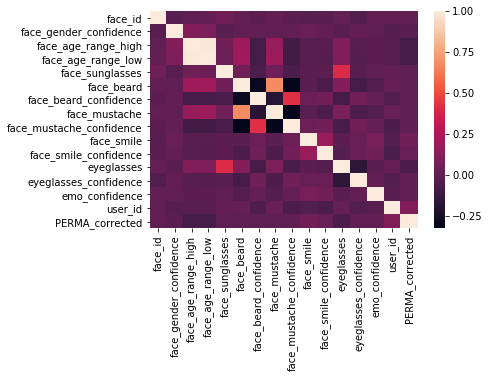

In [12]:
# correlartion matrix
corr = face_perma.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

# at first sight, face_smile seems to have a little correlation with the corrected PERMA score

In [13]:
# only use the face_emo with the highest emo_confidence per face_id per image_id

face_perma = face_perma.sort_values(by='emo_confidence', ascending=False).groupby(by='image_id').first()

In [14]:
# drop unnecesary colums
face_perma = face_perma.drop(columns=['face_id','face_gender_confidence','face_beard_confidence',
                        'face_mustache_confidence','face_smile_confidence','eyeglasses_confidence',
                        'emo_confidence'])

In [15]:
face_perma.corr()

,face_age_range_high,face_age_range_low,face_sunglasses,face_beard,face_mustache,face_smile,eyeglasses,user_id,PERMA_corrected
face_age_range_high,1.000000,0.984826,0.041914,0.195243,0.173828,-0.003712,0.096181,-0.033133,-0.064717
face_age_range_low,0.984826,1.000000,0.036017,0.207624,0.186540,-0.003898,0.093243,-0.031757,-0.061347
face_sunglasses,0.041914,0.036017,1.000000,0.059432,0.052017,-0.002170,0.395842,0.018423,0.007673
face_beard,0.195243,0.207624,0.059432,1.000000,0.672670,-0.017132,0.124009,0.018912,-0.003469
face_mustache,0.173828,0.186540,0.052017,0.672670,1.000000,-0.011409,0.090553,0.023445,-0.003425
face_smile,-0.003712,-0.003898,-0.002170,-0.017132,-0.011409,1.000000,-0.003559,-0.036882,0.071682
eyeglasses,0.096181,0.093243,0.395842,0.124009,0.090553,-0.003559,1.000000,0.024338,-0.061350
user_id,-0.033133,-0.031757,0.018423,0.018912,0.023445,-0.036882,0.024338,1.000000,0.090911
PERMA_corrected,-0.064717,-0.061347,0.007673,-0.003469,-0.003425,0.071682,-0.061350,0.090911,1.000000


In [16]:
# get dummies for objects
face_perma_dummies = pd.get_dummies(face_perma).reset_index()

In [17]:
face_perma_dummies.head()

,image_id,face_age_range_high,face_age_range_low,face_sunglasses,face_beard,face_mustache,face_smile,eyeglasses,user_id,PERMA_corrected,face_gender_Female,face_gender_Male,face_emo_ANGRY,face_emo_CALM,face_emo_CONFUSED,face_emo_DISGUSTED,face_emo_HAPPY,face_emo_SAD,face_emo_SURPRISED
0,1000126179441391393_30837828,44.0,27.0,False,False,False,True,False,30837828,6.800000,1,0,0,0,0,0,1,0,0
1,1000135251972767429_31447990,38.0,23.0,False,False,False,True,False,31447990,9.333333,1,0,0,0,0,0,1,0,0
2,1000159024449036821_265063047,43.0,26.0,False,True,False,True,False,265063047,4.666667,1,0,0,0,0,0,0,0,1
3,1000185226634350811_276232195,47.0,30.0,False,True,True,True,False,276232195,8.666667,0,1,0,0,0,0,0,0,1
4,1000204070831242247_143854846,43.0,26.0,False,False,False,True,False,143854846,6.533333,1,0,0,0,0,0,1,0,0


In [18]:
# get the mean values of the ages (min and max) and put them into the total_face_df
face_age_range_high_mean = face_perma_dummies.groupby('user_id', as_index=False)['face_age_range_high'].mean()
face_age_range_low_mean = face_perma_dummies.groupby('user_id', as_index=False)['face_age_range_low'].mean()
total_face_df = pd.merge(face_age_range_high_mean,face_age_range_low_mean, how='inner', on='user_id')

In [19]:
# get the number of unique number of images per user_id
n_image_df = face_perma_dummies.groupby(by='user_id')['image_id'].nunique()
n_image_df = n_image_df.reset_index()


In [20]:
n_image_df

,user_id,image_id
0,1619510,429
1,2829661,39
2,3069744,166
3,3988856,122
4,4185084,8
5,6734387,229
6,7410944,143
7,8854187,196
8,9931123,3
9,11520833,114


In [21]:
total_face_df = pd.merge(total_face_df,n_image_df,how='inner',on='user_id')

# rename column into n_images
total_face_df = total_face_df.rename(columns={'image_id':'n_images'})

In [22]:
total_face_df

,user_id,face_age_range_high,face_age_range_low,n_images
0,1619510,39.659674,24.545455,429
1,2829661,41.179487,24.923077,39
2,3069744,38.542169,23.072289,166
3,3988856,39.663934,24.762295,122
4,4185084,43.125000,26.125000,8
5,6734387,39.951965,23.956332,229
6,7410944,34.566434,21.223776,143
7,8854187,23.831633,13.979592,196
8,9931123,5.333333,1.666667,3
9,11520833,34.570175,21.105263,114


In [23]:
# Sum all the boolean variables to add them to the final dataframe where we can calculate the mean per user

face_sunglasses_df = face_perma_dummies.groupby('user_id',as_index=False)['face_sunglasses'].sum()
face_beard_df = face_perma_dummies.groupby('user_id',as_index=False)['face_beard'].sum()
# face_mustache_df = face_perma_dummies.groupby('user_id',as_index=False)['face_mustache'].sum()
face_smile_df = face_perma_dummies.groupby('user_id',as_index=False)['face_smile'].sum()
eyeglasses_df = face_perma_dummies.groupby('user_id',as_index=False)['eyeglasses'].sum()
face_gender_Female_df = face_perma_dummies.groupby('user_id',as_index=False)['face_gender_Female'].sum()
face_gender_Male_df = face_perma_dummies.groupby('user_id',as_index=False)['face_gender_Male'].sum()
face_emo_ANGRY_df = face_perma_dummies.groupby('user_id',as_index=False)['face_emo_ANGRY'].sum()
face_emo_CALM_df = face_perma_dummies.groupby('user_id',as_index=False)['face_emo_CALM'].sum()
face_emo_DISGUSTED_df = face_perma_dummies.groupby('user_id',as_index=False)['face_emo_DISGUSTED'].sum()
face_emo_HAPPY_df =  face_perma_dummies.groupby('user_id',as_index=False)['face_emo_HAPPY'].sum()
face_emo_SAD_df = face_perma_dummies.groupby('user_id',as_index=False)['face_emo_SAD'].sum()
face_emo_SURPRISED_df = face_perma_dummies.groupby('user_id',as_index=False)['face_emo_SURPRISED'].sum()

In [24]:
from functools import reduce

dfs = [total_face_df,face_sunglasses_df,face_beard_df,face_smile_df,eyeglasses_df,face_gender_Female_df,
      face_gender_Male_df,face_emo_ANGRY_df,face_emo_CALM_df,face_emo_DISGUSTED_df,face_emo_HAPPY_df,
      face_emo_SAD_df,face_emo_SURPRISED_df]

df_face_final = reduce(lambda left,right: pd.merge(left,right,on='user_id'), dfs)


In [25]:
# make new columns to calculate the perc of images contain the object or emotion per user. 
#for example: average number of sunglasses detected per foto for each user
df_face_final['face_sunglasses_perc'] = df_face_final['face_sunglasses'] / df_face_final['n_images']
df_face_final['face_beard_perc'] = df_face_final['face_beard'] / df_face_final['n_images']
# df_face_final['face_mustache_perc'] = df_face_final['face_mustache'] / df_face_final['n_images']
df_face_final['face_smile_perc'] = df_face_final['face_smile'] / df_face_final['n_images']
df_face_final['eyeglasses_perc'] = df_face_final['eyeglasses'] / df_face_final['n_images']
df_face_final['face_gender_Female_perc'] = df_face_final['face_gender_Female'] / df_face_final['n_images']
df_face_final['face_gender_Male_perc'] = df_face_final['face_gender_Male'] / df_face_final['n_images']
df_face_final['face_emo_ANGRY_perc'] = df_face_final['face_emo_ANGRY'] / df_face_final['n_images']
df_face_final['face_emo_CALM_perc'] = df_face_final['face_emo_CALM'] / df_face_final['n_images']
df_face_final['face_emo_DISGUSTED_perc'] = df_face_final['face_emo_DISGUSTED'] / df_face_final['n_images']
df_face_final['face_emo_HAPPY_perc'] = df_face_final['face_emo_HAPPY'] / df_face_final['n_images']
df_face_final['face_emo_SAD_perc'] = df_face_final['face_emo_SAD'] / df_face_final['n_images']
df_face_final['face_emo_SURPRISED_perc'] = df_face_final['face_emo_SURPRISED'] / df_face_final['n_images']


In [26]:
# drop old columns
df_face_final = df_face_final.drop(columns=['face_sunglasses','face_beard','face_smile','eyeglasses','face_gender_Male',
                                            'face_emo_ANGRY','face_emo_CALM','face_emo_DISGUSTED','face_emo_HAPPY',
                                            'face_emo_SAD','face_emo_SURPRISED','face_gender_Female'])

In [27]:
# add perma to df_face_final
perma_df = survey_df.groupby('user_id', as_index=False)['PERMA_corrected'].mean()
perma_df

,user_id,PERMA_corrected
0,1619510,4.533333
1,2829661,7.800000
2,3069744,5.733333
3,3988856,9.266667
4,4185084,6.666667
5,6734387,6.333333
6,7410944,7.800000
7,8854187,6.666667
8,9931123,6.933333
9,11520833,7.666667


In [28]:
# merge perma_df with df_face_final
df_face_final = pd.merge(df_face_final,perma_df,how='inner',on='user_id')

In [42]:
df_face_final.corr()

,user_id,n_images,face_sunglasses_perc,face_beard_perc,face_smile_perc,eyeglasses_perc,face_gender_Female_perc,face_gender_Male_perc,face_emo_ANGRY_perc,face_emo_CALM_perc,face_emo_DISGUSTED_perc,face_emo_HAPPY_perc,face_emo_SAD_perc,face_emo_SURPRISED_perc,PERMA_corrected,face_age_mean
user_id,1.000000,-0.346921,0.024612,0.101272,-0.071914,0.215851,-0.232293,0.232293,0.088391,-0.015583,-0.025306,-0.092552,0.101079,0.026613,0.008269,0.009160
n_images,-0.346921,1.000000,0.047846,-0.111387,-0.014411,-0.042494,0.136416,-0.136416,-0.091592,-0.032799,0.043180,0.047839,0.094018,-0.002815,-0.130413,0.003945
face_sunglasses_perc,0.024612,0.047846,1.000000,-0.019421,-0.113911,0.259572,-0.144510,0.144510,-0.027590,-0.012385,-0.035345,-0.031320,0.008260,0.079944,0.040342,0.178919
face_beard_perc,0.101272,-0.111387,-0.019421,1.000000,-0.266198,0.255903,-0.595784,0.595784,0.460723,-0.028655,0.136372,-0.206141,0.048416,-0.078264,0.073954,0.301052
face_smile_perc,-0.071914,-0.014411,-0.113911,-0.266198,1.000000,-0.127398,0.256365,-0.256365,-0.533391,-0.379063,-0.105640,0.714063,-0.482123,-0.291894,0.085782,-0.051069
eyeglasses_perc,0.215851,-0.042494,0.259572,0.255903,-0.127398,1.000000,-0.150839,0.150839,-0.007548,-0.042129,0.177240,-0.052502,0.303158,-0.037481,-0.074672,0.254904
face_gender_Female_perc,-0.232293,0.136416,-0.144510,-0.595784,0.256365,-0.150839,1.000000,-1.000000,-0.300193,-0.117934,-0.133532,0.371276,-0.022501,-0.018073,-0.122571,-0.388791
face_gender_Male_perc,0.232293,-0.136416,0.144510,0.595784,-0.256365,0.150839,-1.000000,1.000000,0.300193,0.117934,0.133532,-0.371276,0.022501,0.018073,0.122571,0.388791
face_emo_ANGRY_perc,0.088391,-0.091592,-0.027590,0.460723,-0.533391,-0.007548,-0.300193,0.300193,1.000000,0.129919,0.069676,-0.498685,0.011715,-0.135961,0.121783,0.131133
face_emo_CALM_perc,-0.015583,-0.032799,-0.012385,-0.028655,-0.379063,-0.042129,-0.117934,0.117934,0.129919,1.000000,0.151291,-0.581416,0.131281,0.207234,-0.125165,-0.087912


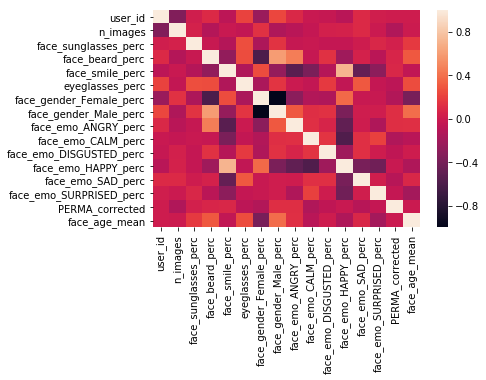

In [41]:
# correlartion matrix
corr = df_face_final.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

In [30]:
# get a mean value between age range high and low
df_face_final['face_age_mean'] = df_face_final[['face_age_range_high','face_age_range_low']].mean(axis=1)

In [31]:
df_face_final = df_face_final.drop(columns=['face_age_range_high','face_age_range_low'])

## Linear regression

In [32]:
from sklearn.linear_model import LinearRegression
X = df_face_final.drop('PERMA_corrected', axis = 1)

#This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
lm.fit(X, df_face_final.PERMA_corrected)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
#print the intercept and number of coefficients.
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Estimated intercept coefficient: 6.993714427592536
Number of coefficients: 15


In [35]:
#Construct a data frame that contains features and estimated coefficients.
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,user_id,-9.554964e-11
1,n_images,-1.097155e-03
2,face_sunglasses_perc,1.272279e+00
3,face_beard_perc,-1.126391e-01
4,face_smile_perc,2.453372e+00
5,eyeglasses_perc,-4.399501e-01
6,face_gender_Female_perc,-3.647122e-01
7,face_gender_Male_perc,3.647122e-01
8,face_emo_ANGRY_perc,2.403825e+00
9,face_emo_CALM_perc,-4.151677e+00


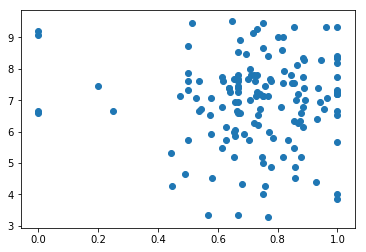

In [36]:
plt.scatter(df_face_final.face_emo_HAPPY_perc,df_face_final.PERMA_corrected)


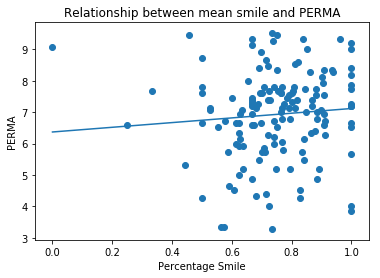

In [37]:
x = df_face_final.face_smile_perc
y = df_face_final.PERMA_corrected

plt.scatter(x, y)
plt.xlabel("Percentage Smile")
plt.ylabel("PERMA")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.title("Relationship between mean smile and PERMA")
plt.show()

In [38]:
def run_multi_linear_regression (features_list , dataframe):
    X = dataframe[features_list]
    y = dataframe['PERMA_corrected']
    
    X_train, X_test,  y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

#     print(X_train.shape)
#     print(X_test.shape)
#     print(y_train.shape)
#     print(y_test.shape)
    lm = LinearRegression()
    crossval_score = cross_val_score(lm, X_train, y_train, cv=5, scoring = 'neg_mean_squared_error')
    lm.fit(X_train, y_train)
    
    X2 = sm.add_constant(X_train)
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    print(est2.summary())
    
    #Make prediction
    y_pred = lm.predict(X_test)
    #The intercept
    print('Intercept: \n', lm.intercept_)
    #The coefficients
    print('Coefficients: \n', lm.coef_)
#     The mean squared error
    print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
#     The root mean squared error
    print("Root mean squared error: %.2f"% math.sqrt(mean_squared_error(y_test, y_pred)))
#     Explained variance score: 1 is perfect prediction
    print('R squared: %.2f' % r2_score(y_test, y_pred))
    results_dict = {'features':features_list,
                    'MSE': mean_squared_error(y_test, y_pred),
                   'R_sq': r2_score(y_test, y_pred),
                    'cross_val': [crossval_score.mean(), crossval_score.std()]}
                   
    
    return results_dict    

In [39]:
# step-up feature selection

features = list(df_face_final)
features.remove('PERMA_corrected')
features.remove('user_id')
features.remove('face_emo_HAPPY_perc')
features.remove('face_mustache_perc')
features.remove('face_beard_perc')
# features.remove('face_emo_DISGUSTED_perc')
features.remove('face_emo_SURPRISED_perc')
features.remove('face_emo_SAD_perc')
features.remove('eyeglasses_perc')
features.remove('face_age_range_high')
features.remove('face_age_range_low')
features.remove('face_smile_perc')
features.remove('face_emo_ANGRY_perc')
features.remove('face_sunglasses_perc')
# features.remove('face_emo_CALM_perc')
features.remove('n_images')
features.remove('face_gender_Female_perc')
features.remove('face_gender_Male_perc')

features_for_regr = features

run_multi_linear_regression(features_for_regr.copy(), df_face_final)

ValueError: list.remove(x): x not in list

In [ ]:
from sklearn.feature_selection import RFECV

m = RFECV(LinearRegression(),step=1, cv=5)

features = list(df_face_final)

X = df_face_final.iloc[:,1:17]
y = df_face_final['PERMA_corrected']

X_train, X_test,  y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

# crossval_score = cross_val_score(lm, X_train, y_train, cv=5, scoring = 'neg_mean_squared_error')
m.fit(X_train, y_train)

In [ ]:
m.get_support()

In [ ]:
X.iloc[:,11].name

In [ ]:
X.iloc[:,12].name

In [40]:
face_df_final.corr()

NameError: name 'face_df_final' is not defined

In [ ]:
face_df_final = df_face_final.drop(columns='PERMA_corrected')


In [ ]:
face_df_final.to_pickle("./face_df_final.pkl")

In [ ]:
face

In [ ]:
face_df_final.corr()